In [19]:
%reload_ext autoreload
%autoreload 2

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
kw_path = "data/keywords.txt"

In [22]:
def load_keywords(path):
    res = []
    with open(path) as f:
        text = f.read().strip()
        tags_str = text.split(",")
        res = map(lambda t: [_.strip() for _ in t.split(">")], tags_str)
        res = filter(lambda x: len(x) > 0, res)
        res = list(res)
    return res

In [23]:
KEYWORDS = load_keywords(kw_path)

In [24]:
len(KEYWORDS), len(set([kw for kws in KEYWORDS for kw in kws]))

(1654, 1320)

# Analysis

Here we explore the distribution of the keywords at different levels of hierarcy.

## Observation

- **Level 1** seems to have the lowest number of classes (N=29).
(This is important as we will use a very basic BERT-based **multi-label** classification for **Level 1** keywords)
- The class/tag/keyword distribution is extremely skewed at levels 0 (root, mostly earth science) and -1 (leaf nodes)

In [25]:
from collections import Counter, defaultdict

In [15]:
from loguru import logger

In [26]:
def get_counts(keywords, level=0):
    kws = map(lambda x: x[level if level<len(x) else len(x)-1], keywords)
    kws = list(kws)
    counter = Counter(kws)
    return counter

In [27]:
def analyze_kws(keywords, topn=10):
    plt.figure(figsize=(15, 8))
    for level in [0, 1, 2, 3, -1]:
        _ = get_counts(KEYWORDS, level=level)
        logger.debug(f"[Level={level}, NKWs={len(_)}] : {_.most_common(10)}")
        df = pd.DataFrame(_.most_common(topn), columns=["kw", "frequency"])
        ax = sns.barplot(
            x="frequency", y="kw",
            data=df,
            linewidth=2.5,
            facecolor=(1, 1, 1, 0),
            errcolor=".2",
            edgecolor=".2"
        )
        plt.title(f"Level={level}, topn={topn}")
        plt.figure(figsize=(15, 8))

2021-07-28 19:02:36.556 | DEBUG    | __main__:analyze_kws:5 - [Level=0, NKWs=10] : [('earth science', 1645), ('breakup date', 1), ('ice duration', 1), ('oceans', 1), ('surface', 1), ('and internal layer geometry', 1), ('earth observation satellites', 1), ('earth remote sensing instruments', 1), ('earth science services', 1), ('timing', 1)]
2021-07-28 19:02:36.599 | DEBUG    | __main__:analyze_kws:5 - [Level=1, NKWs=29] : [('atmosphere', 422), ('oceans', 202), ('land surface', 160), ('cryosphere', 148), ('biosphere', 118), ('terrestrial hydrosphere', 117), ('spectral/engineering', 95), ('human dimensions', 85), ('biological classification', 83), ('agriculture', 65)]
2021-07-28 19:02:36.656 | DEBUG    | __main__:analyze_kws:5 - [Level=2, NKWs=141] : [('snow/ice', 105), ('soils', 92), ('sea ice', 81), ('animals/vertebrates', 70), ('clouds', 62), ('atmospheric chemistry', 61), ('atmospheric radiation', 51), ('glaciers/ice sheets', 44), ('aerosols', 44), ('atmospheric winds', 42)]
2021-07-2

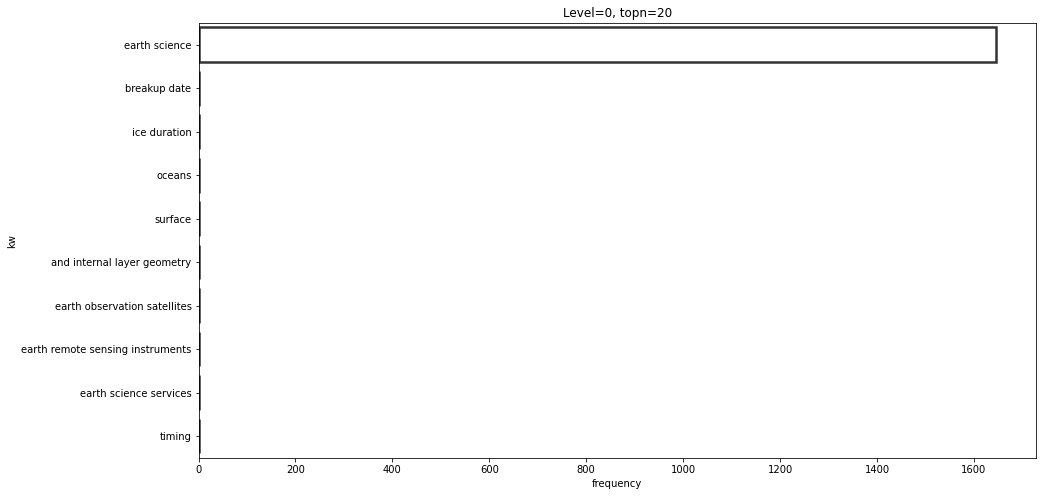

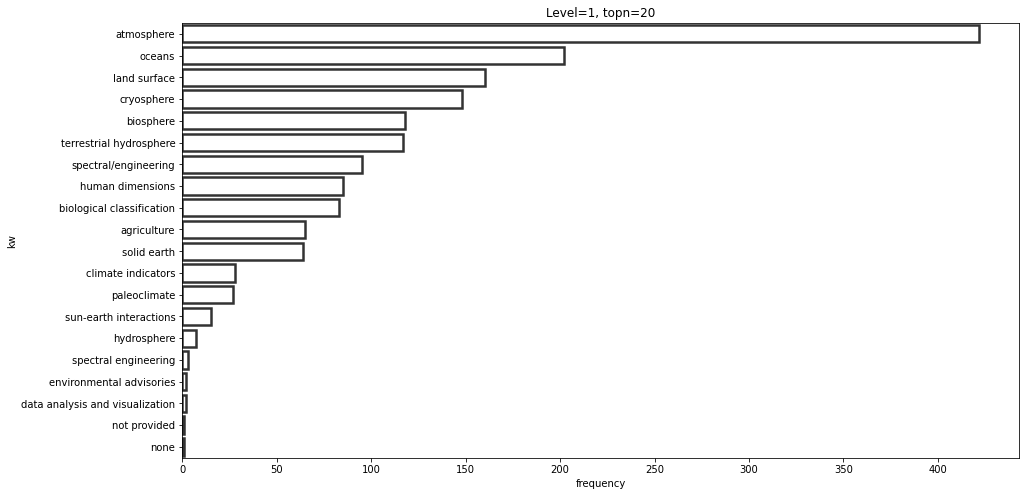

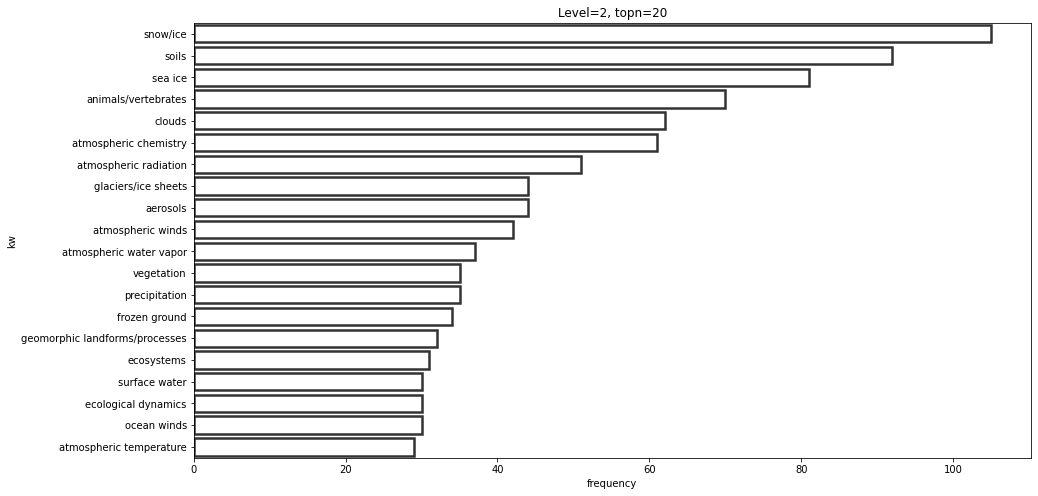

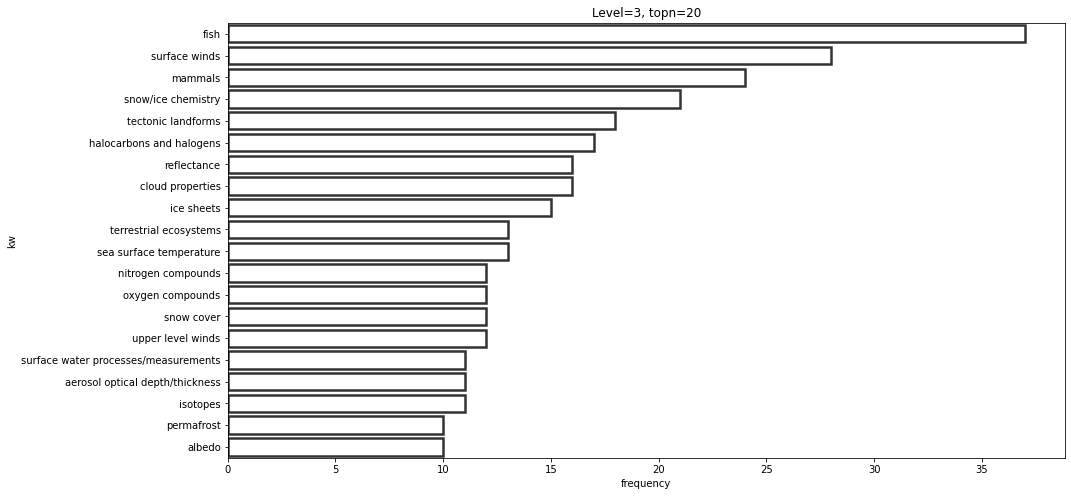

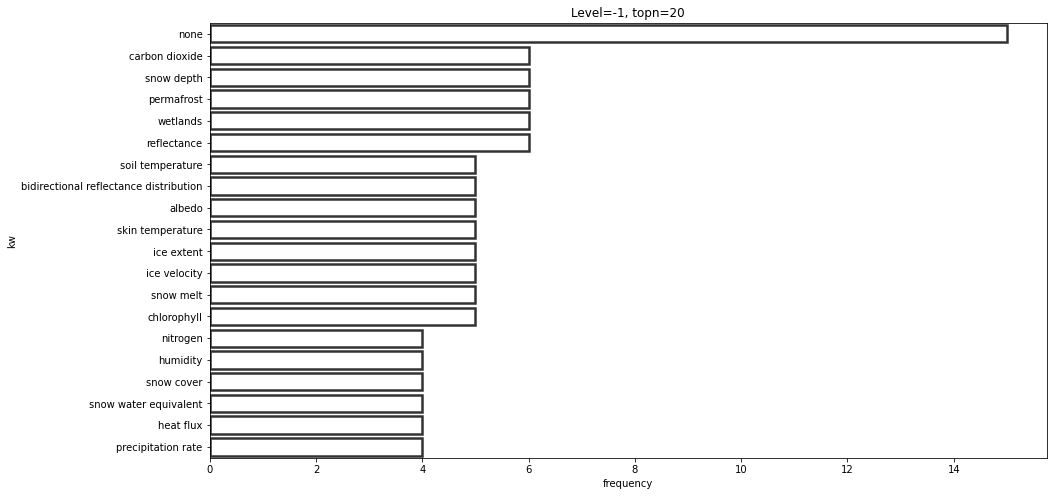

<Figure size 1080x576 with 0 Axes>

In [28]:
analyze_kws(KEYWORDS, topn=20)

In [31]:
get_counts(KEYWORDS, level=2)

Counter({'surface water': 30,
         'rocks/minerals': 2,
         'sea ice': 81,
         'boundaries': 4,
         'environmental governance/management': 9,
         'air quality': 12,
         'atmospheric chemistry': 61,
         'animals/vertebrates': 70,
         'ecological dynamics': 30,
         'vegetation': 35,
         'environmental impacts': 15,
         'habitat conversion/fragmentation': 6,
         'public health': 6,
         'socioeconomics': 3,
         'sustainability': 1,
         'erosion/sedimentation': 13,
         'land use/land cover': 13,
         'soils': 92,
         'rocks/minerals/crystals': 1,
         'ground water': 9,
         'water quality/water chemistry': 22,
         'ocean chemistry': 22,
         'agricultural aquatic sciences': 2,
         'human settlements': 3,
         'precipitation': 35,
         'glaciers/ice sheets': 44,
         'snow/ice': 105,
         'ecosystems': 31,
         'natural hazards': 12,
         'weather events': 4,